Nama : Zalfaa Putri Ayudhia

NIM : 1301200301

Kelas : IF-44-12

Case Based 1 Machine Learning Subject

NIM GANJIL --> AUDIT RISK

## **Libraries**

In [155]:
#libraries for data
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#libraries for model
import tensorflow as tf

#libraries for traintest and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Data Preprocessing**

In [156]:
# Read data using pandas
audit = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

In [157]:
audit

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [158]:
trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


Cek apakah data audit dan trial memiliki atribut yang salah satu nilainya NULL

In [159]:
audit.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [160]:
trial.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
PARA_B           False
SCORE_B          False
TOTAL            False
numbers          False
Marks            False
Money_Value       True
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History          False
History_score    False
Score            False
Risk             False
dtype: bool

Money_Value memiliki data NULL, diisi dengan median dari atribut tersebut

In [161]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

Cek tipe data pada masing-masing data

In [162]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [163]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

Terlihat Score_A dan Scroe_B pada data audit dan atribut tidak sesuai, disamakan dengan mengubah atribut score_A dan score_B pada data trial menjadi real / float

In [164]:
trial['SCORE_A']=trial['SCORE_A'].astype(float)
trial['SCORE_B']=trial['SCORE_B'].astype(float)

In [165]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A          float64
PARA_B           float64
SCORE_B          float64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

### Outlier Data

Cek apakah ada outlier pada masing-masing atribut pada data audit

In [166]:
bplot1=[audit['PARA_A'],audit['Score_A'],audit['Risk_A'],audit['PARA_B'],audit['Score_B'],audit['Risk_B'],audit['TOTAL']]
bplot2=[audit['numbers'],audit['Score_B.1'],audit['Risk_C'],audit['Money_Value'],audit['Score_MV'],audit['Risk_D'],audit['District_Loss']]
bplot3=[audit['PROB'],audit['RiSk_E'],audit['History'],audit['Prob'],audit['Risk_F'],audit['Score'],audit['Inherent_Risk']]
bplot4=[audit['CONTROL_RISK'],audit['Detection_Risk'],audit['Audit_Risk'],audit['Risk']]

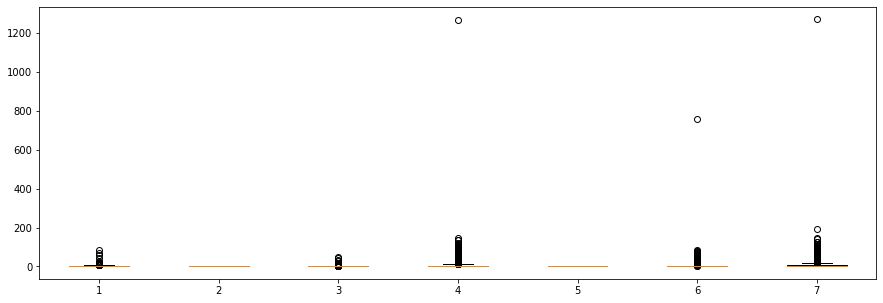

In [167]:
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1)

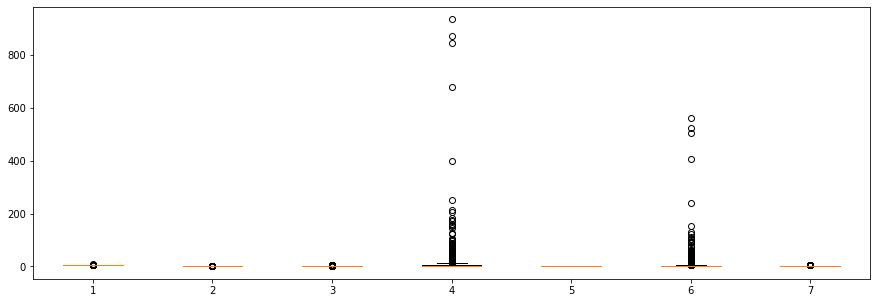

In [168]:
fig ,ax= plt.subplots(figsize = (15,5))
bp2=ax.boxplot(bplot2)

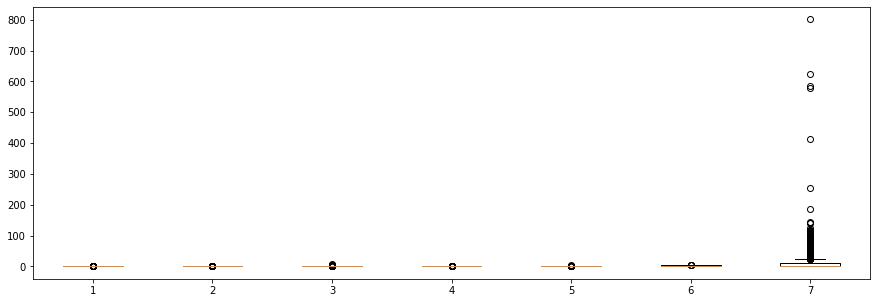

In [169]:
fig ,ax= plt.subplots(figsize = (15,5))
bp3=ax.boxplot(bplot3)

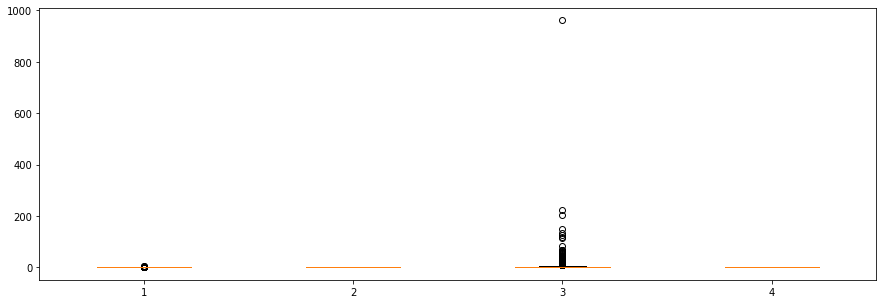

In [170]:
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(bplot4)

Cek apakah ada outlier pada masing-masing atribut pada data trial

In [171]:
tplot1=[trial['PARA_A'],trial['SCORE_A'],trial['PARA_B'],trial['SCORE_B'],trial['TOTAL']]
tplot2=[trial['numbers'],trial['Marks'],trial['Money_Value'],trial['MONEY_Marks'],trial['District'],trial['Loss'],trial['LOSS_SCORE']]
tplot3=[trial['History'],trial['History_score'],trial['Score'],trial['Risk']]

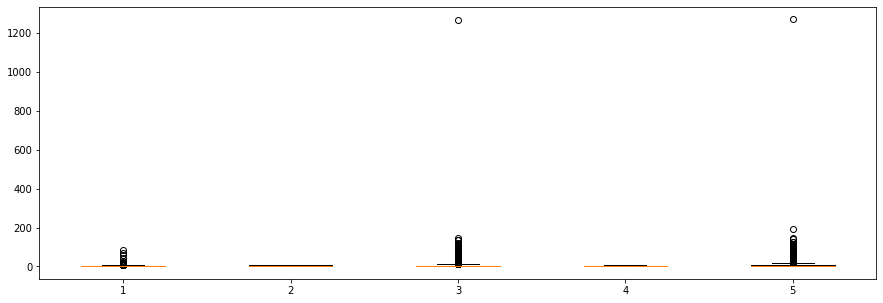

In [172]:
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(tplot1)

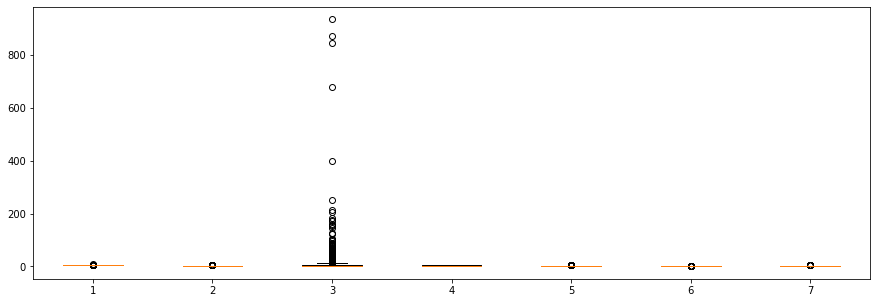

In [173]:
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(tplot2)

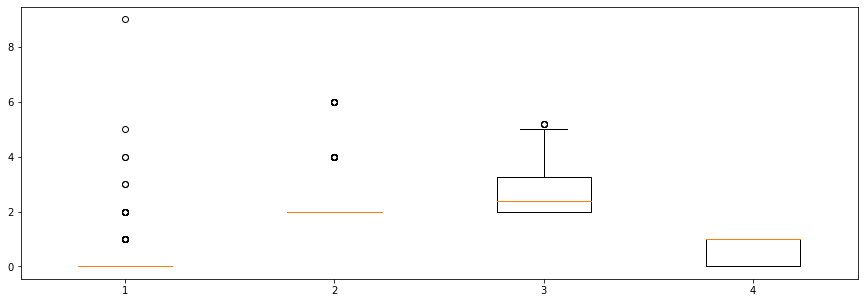

In [174]:
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(tplot3)

Hapus outlier pada data Audit

In [175]:
# Cek bentuk data
audit.shape

(776, 27)

In [176]:
# ubah nilai negatif menjadi nilai absolut/mutlak
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z)

     Sector_score    PARA_A   Score_A    Risk_A        PARA_B   Score_B  \
0        0.670465  0.304800  1.429846  0.336502  1.658295e-01  0.666752   
1        0.670465  0.431736  0.869761  0.392943  1.192773e-01  0.666752   
2        0.670465  0.341872  0.869761  0.363277  2.111829e-01  0.666752   
3        0.670465  0.431736  0.869761  0.392943  2.317208e-07  1.690422   
4        0.670465  0.431736  0.869761  0.392943  2.141798e-01  0.666752   
..            ...       ...       ...       ...           ...       ...   
771      1.455992  0.345396  0.869761  0.364440  2.077864e-01  0.666752   
772      1.455992  0.348920  0.869761  0.365603  2.083858e-01  0.666752   
773      1.455992  0.389447  0.869761  0.378982  2.149790e-01  0.666752   
774      1.455992  0.396495  0.869761  0.381309  2.157782e-01  0.666752   
775      1.455992  0.431736  0.869761  0.392943  2.157782e-01  0.666752   

       Risk_B     TOTAL   numbers  Score_B.1  ...    RiSk_E   History  \
0    0.194121  0.127506  0

In [177]:
outlier =list((np.where(z > 4.0)))
outlier

[array([  3,   3,  11,  39,  39,  39,  48,  50,  58,  70,  70,  71,  71,
         71,  80,  80,  80,  80,  81,  81,  81,  81,  81,  85,  85,  93,
         93, 119, 119, 119, 121, 124, 124, 124, 125, 125, 125, 125, 143,
        144, 151, 154, 154, 156, 156, 157, 157, 157, 164, 170, 190, 190,
        190, 203, 203, 206, 208, 208, 208, 214, 214, 218, 218, 219, 224,
        224, 226, 226, 226, 241, 241, 241, 241, 241, 241, 241, 242, 242,
        242, 245, 245, 245, 247, 247, 247, 247, 247, 272, 274, 274, 276,
        276, 276, 276, 283, 283, 342, 342, 342, 342, 342, 391, 398, 413,
        413, 413, 414, 414, 414, 420, 420, 420, 464, 467, 467, 484, 484,
        484, 484, 484, 484, 484, 484, 484, 485, 485, 485, 486, 486, 486,
        486, 486, 486, 486, 494, 494, 494, 494, 494, 494, 495, 495, 509,
        509, 550, 584, 584, 584, 647]),
 array([ 9, 10, 15, 11, 13, 21, 18, 15, 18,  9, 10, 17, 18, 19, 17, 18, 19,
        22,  1,  3, 11, 13, 21, 15, 18,  9, 10, 17, 18, 19, 15,  8,  9, 10,
     

In [178]:
# Drop baris yang memiliki outlier
rows=set(outlier[0])
delrows =list(rows)
new_audit=audit.drop(delrows)

In [179]:
# Cek bentuk data setelah outlier dihapus
new_audit.shape

(718, 27)

Hapus outlier pada data trial

In [180]:
trial.shape

(776, 18)

In [181]:
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

     Sector_score    PARA_A   SCORE_A        PARA_B   SCORE_B     TOTAL  \
0        0.670465  0.304800  1.429846  1.658295e-01  0.666752  0.127506   
1        0.670465  0.431736  0.869761  1.192773e-01  0.666752  0.163583   
2        0.670465  0.341872  0.869761  2.111829e-01  0.666752  0.243341   
3        0.670465  0.431736  0.869761  2.317208e-07  1.690422  0.047162   
4        0.670465  0.431736  0.869761  2.141798e-01  0.666752  0.256212   
..            ...       ...       ...           ...       ...       ...   
771      1.455992  0.345396  0.869761  2.077864e-01  0.666752  0.240416   
772      1.455992  0.348920  0.869761  2.083858e-01  0.666752  0.241391   
773      1.455992  0.389447  0.869761  2.149790e-01  0.666752  0.252312   
774      1.455992  0.396495  0.869761  2.157782e-01  0.666752  0.253872   
775      1.455992  0.431736  0.869761  2.157782e-01  0.666752  0.257772   

      numbers     Marks  Money_Value  MONEY_Marks  District      Loss  \
0    0.255998  0.295285   

In [182]:
outlier =list((np.where(z > 3.99)))
rows=set(outlier[0])
delrows =list(rows)
new_trial = trial.drop(delrows)
new_trial.shape

(718, 18)

### Skewed Columns

Drop data yang memiliki kemiringan 100% pada data audit

In [183]:
for i in range(0,len(new_audit.columns)):
    print(new_audit.columns.values[i], 
          ":  {:,.2f}".format(new_audit.iloc[:,i].value_counts(normalize=True).values[0]*100),"%")

Sector_score :  27.58 %
LOCATION_ID :  9.75 %
PARA_A :  20.19 %
Score_A :  55.85 %
Risk_A :  20.19 %
PARA_B :  37.33 %
Score_B :  70.33 %
Risk_B :  37.33 %
TOTAL :  12.26 %
numbers :  94.57 %
Score_B.1 :  94.57 %
Risk_C :  94.57 %
Money_Value :  45.40 %
Score_MV :  77.99 %
Risk_D :  45.54 %
District_Loss :  85.52 %
PROB :  100.00 %
RiSk_E :  85.52 %
History :  95.82 %
Prob :  95.82 %
Risk_F :  95.82 %
Score :  40.39 %
Inherent_Risk :  7.24 %
CONTROL_RISK :  81.89 %
Detection_Risk :  100.00 %
Audit_Risk :  7.24 %
Risk :  65.32 %


In [184]:
new_audit.drop(['PROB'], axis=1, inplace = True)
new_audit.drop(['Detection_Risk'], axis=1, inplace = True)

In [185]:
new_audit.shape

(718, 25)

Drop data yang memiliki kemiringan 100% pada data trial

In [186]:
for i in range(0,len(new_trial.columns)):
    print(new_trial.columns.values[i]
          , ":  {:,.2f}".format(new_trial.iloc[:,i].value_counts(normalize=True).values[0]*100),"%")

Sector_score :  27.58 %
LOCATION_ID :  9.75 %
PARA_A :  20.19 %
SCORE_A :  55.85 %
PARA_B :  37.33 %
SCORE_B :  70.33 %
TOTAL :  12.26 %
numbers :  94.57 %
Marks :  94.57 %
Money_Value :  45.40 %
MONEY_Marks :  77.99 %
District :  85.52 %
Loss :  100.00 %
LOSS_SCORE :  100.00 %
History :  95.82 %
History_score :  95.82 %
Score :  40.39 %
Risk :  59.61 %


In [187]:
new_trial.drop(['Loss'], axis=1, inplace = True)
new_trial.drop(['LOSS_SCORE'], axis=1, inplace = True)

In [188]:
new_trial.shape

(718, 16)

### Merge Datasets

In [189]:
atribute = new_trial.columns.difference(new_audit.columns)
atribute

Index(['District', 'History_score', 'MONEY_Marks', 'Marks', 'SCORE_A',
       'SCORE_B'],
      dtype='object')

In [190]:
data = pd.merge(new_audit,new_trial[atribute],how='inner',left_index=True, right_index=True)
data = data.drop(['SCORE_A','SCORE_B'],axis = 1)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 775
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   718 non-null    float64
 1   LOCATION_ID    718 non-null    object 
 2   PARA_A         718 non-null    float64
 3   Score_A        718 non-null    float64
 4   Risk_A         718 non-null    float64
 5   PARA_B         718 non-null    float64
 6   Score_B        718 non-null    float64
 7   Risk_B         718 non-null    float64
 8   TOTAL          718 non-null    float64
 9   numbers        718 non-null    float64
 10  Score_B.1      718 non-null    float64
 11  Risk_C         718 non-null    float64
 12  Money_Value    718 non-null    float64
 13  Score_MV       718 non-null    float64
 14  Risk_D         718 non-null    float64
 15  District_Loss  718 non-null    int64  
 16  RiSk_E         718 non-null    float64
 17  History        718 non-null    int64  
 18  Prob      

### Korelasi

Hapus atribut yang berkorelasi tinggi

In [192]:
corrmat= (data.corr().abs())
highcorr=np.where(corrmat>0.99999999999999999)

highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])
highcorr=list(highcorr)
for i in highcorr:
    print('korelasi ', i[0],' & ',i[1],' : ',data[i[0]].corr(data[i[1]]))

korelasi  numbers  &  Marks  :  1.0
korelasi  District  &  RiSk_E  :  0.9999999999999999
korelasi  Prob  &  History_score  :  1.0
korelasi  numbers  &  Score_B.1  :  0.9999999999999989
korelasi  History_score  &  Risk_F  :  1.0
korelasi  Marks  &  Score_B.1  :  0.9999999999999988
korelasi  Marks  &  numbers  :  1.0
korelasi  Score_MV  &  MONEY_Marks  :  0.9999999999999978
korelasi  Score_B.1  &  numbers  :  0.999999999999999
korelasi  Score_B.1  &  Marks  :  0.9999999999999988
korelasi  History_score  &  Prob  :  1.0
korelasi  Risk_F  &  History_score  :  1.0
korelasi  MONEY_Marks  &  Score_MV  :  0.9999999999999978
korelasi  RiSk_E  &  District  :  0.9999999999999998


In [193]:
data = data.drop(['Marks','Risk_F','District','Prob','History_score','Risk_C','LOCATION_ID'],axis = 1)

In [194]:
data.to_csv("Data_Preprocessed.csv")

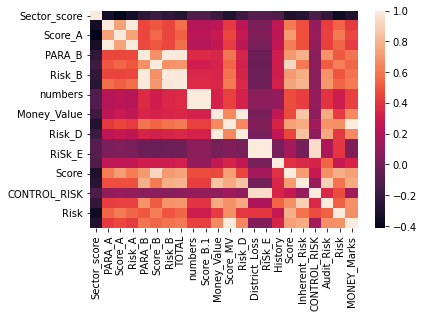

In [195]:
# Cek Korelasi Data
cor=data.corr()
sns.heatmap(cor)

### Split and scaling

Cek Kualifikasi Data

In [196]:
data

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Risk_D,District_Loss,RiSk_E,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.676,2,0.4,0,2.4,8.574,0.4,1.7148,1,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.188,2,0.4,0,2.0,2.554,0.4,0.5108,0,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.000,2,0.4,0,2.0,1.548,0.4,0.3096,0,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.000,2,0.4,0,2.0,1.416,0.4,0.2832,0,2
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.590,2,0.4,0,2.0,2.156,0.4,0.4312,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,0.000,2,0.4,0,2.0,1.578,0.4,0.3156,0,2
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,0.000,2,0.4,0,2.0,1.568,0.4,0.3136,0,2
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.000,2,0.4,0,2.0,1.456,0.4,0.2912,0,2
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.000,2,0.4,0,2.0,1.440,0.4,0.2880,0,2


In [197]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,718.0,21.288301,24.713569,1.85,2.37000,3.8900,55.5700,59.8500
PARA_A,718.0,1.882201,2.955371,0.00,0.17250,0.8000,2.1225,20.0400
Score_A,718.0,0.339554,0.170227,0.20,0.20000,0.2000,0.6000,0.6000
Risk_A,718.0,1.005658,1.815749,0.00,0.03450,0.1600,1.2735,12.0240
PARA_B,718.0,7.173010,18.335605,0.00,0.00000,0.3050,2.0150,122.0700
Score_B,718.0,0.300000,0.162185,0.20,0.20000,0.2000,0.4000,0.6000
Risk_B,718.0,4.156752,11.034960,0.00,0.00000,0.0610,0.6930,73.2420
TOTAL,718.0,9.049710,19.861319,0.00,0.49000,1.2750,5.9150,123.2600
numbers,718.0,5.027159,0.113401,5.00,5.00000,5.0000,5.0000,5.5000
Score_B.1,718.0,0.210864,0.045360,0.20,0.20000,0.2000,0.2000,0.4000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


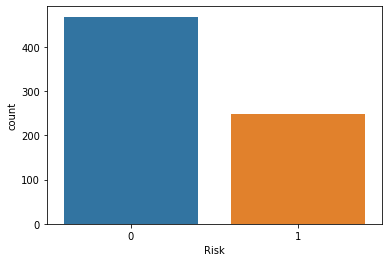

In [198]:
sns.countplot(data['Risk'])

In [199]:
# Assign X dan Y
x = data.drop(['Risk'], axis = 1)
y = data['Risk']

In [200]:
# Split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [201]:
# Scaling with StandardScaler
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [202]:
# Reduce dimension
pca = PCA(n_components=0.95)

x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

## **MODEL ANN**

In [203]:
model = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(16),
        tf.keras.layers.Dense(8),    
        tf.keras.layers.Dense(4),        
        tf.keras.layers.Dense(2),        
        tf.keras.layers.Dense(1, activation = 'sigmoid'),
    ]
)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(learning_rate=0.0000005),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [204]:
history = model.fit(x_train_reduced, y_train, epochs = 150)

Epoch 1/150
18/18 [==============================] - 1s 2ms/step - loss: 0.7144 - accuracy: 0.4199 - precision: 0.0075 - recall: 0.0050     
Epoch 2/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.4199 - precision: 0.0075 - recall: 0.0050    
Epoch 3/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.4216 - precision: 0.0148 - recall: 0.0100    
Epoch 4/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.4233 - precision: 0.0221 - recall: 0.0149    
Epoch 5/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.4251 - precision: 0.0292 - recall: 0.0199    
Epoch 6/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.4268 - precision: 0.0362 - recall: 0.0249    
Epoch 7/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4286 - precision: 0.0432 - recall: 0.0299    
Epoch 8/150
18/18 [

In [205]:
model.evaluate(x_test_reduced, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.9167 - precision: 0.9737 - recall: 0.7708


[0.575373113155365, 0.9166666865348816, 0.9736841917037964, 0.7708333134651184]